[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


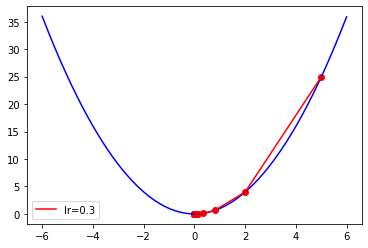

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# Main
# 起始權重
x_start = 5    
# 執行週期數
epochs = 15 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = GD(x_start, dfunc, epochs, lr=lr) 
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
#plt.plot(line_x, line_y, c='b')    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
data = np.random.random((1000, 10)) #隨機產生1000筆資料，每筆資料1包含十個float數字
labels = np.random.randint(2, size=(1000, 1)) #隨機產生1000筆資料，每筆資料上限為2(意思就是0 或 1)
print(np.shape(data))
print(data[0])
print(np.shape(labels))
print(labels[0])

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data, labels, epochs=10, batch_size=32)

score=model.evaluate(data, labels)
print(score[1])

(1000, 10)
[0.91824939 0.29945246 0.86445058 0.6629681  0.73134603 0.43774987
 0.80925597 0.30604813 0.48299818 0.64706968]
(1000, 1)
[0]
Epoch 1/10
1000/1000 [==============================] - 0s 85us/step - loss: 0.6943 - accuracy: 0.5210
Epoch 2/10
1000/1000 [==============================] - 0s 31us/step - loss: 0.6915 - accuracy: 0.5220
Epoch 3/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6902 - accuracy: 0.5390
Epoch 4/10
1000/1000 [==============================] - 0s 31us/step - loss: 0.6889 - accuracy: 0.5400
Epoch 5/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6876 - accuracy: 0.5520
Epoch 6/10
1000/1000 [==============================] - 0s 36us/step - loss: 0.6868 - accuracy: 0.5460
Epoch 7/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6865 - accuracy: 0.5380
Epoch 8/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6856 - accuracy: 0.5450
Epoch 9/10
1000/1000 [================

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.2219 - accuracy: 0.9353
Epoch 2/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0977 - accuracy: 0.9703
Epoch 3/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.0679 - accuracy: 0.9789
Epoch 4/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.0534 - accuracy: 0.9826
Epoch 5/5
10000/10000 [==============================] - 0s 46us/step


[0.0641939846583351, 0.9812999963760376]

In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D
from keras.optimizers import RMSprop
from keras.utils import np_utils
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test)
print(scores[1])

60000 train samples
10000 test samples
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.5301 - accuracy: 0.8547 - val_loss: 0.2902 - val_accuracy: 0.9159
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2809 - accuracy: 0.9192 - val_loss: 0.2497 - val_accuracy: 0.9300
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2432 - accuracy: 0.9296 - val_loss: 0.2338 - val_accuracy: 0.9347
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2201 - accuracy: 0.9366 - val_loss: 0.2152 - val_accuracy: 0.9401
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2036 - val_accuracy: 0.9442
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1898 - accuracy: 0.9454 - val_loss: 0.1925 - val_accuracy: 0.9452
Epoch 7/10
60000/60000 [==============================] - 1s 16us/st

TensorFlow is already loaded. Please restart the runtime to change versions.
11493376/11490434 [==============================] - 1s 0us/step
x_train.shape=(60000, 28, 28), y_train.shape=(60000,)
x_test.shape=(10000, 28, 28), y_test.shape=(10000,)
x_train.shape=(60000, 28, 28, 1)
x_test.shape=(10000, 28, 28, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropo

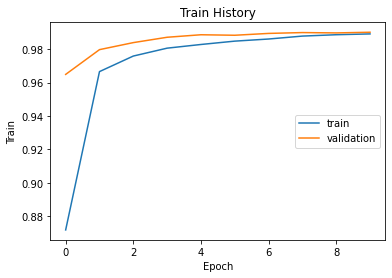

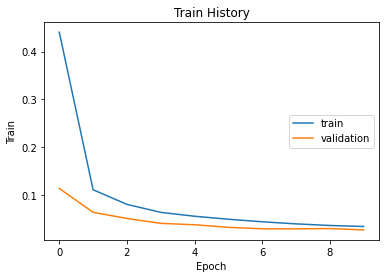

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1130,2,0,0,0,1,1,1,0
2,0,0,1030,0,0,0,0,1,1,0
3,0,0,1,1003,0,4,0,0,2,0
4,0,0,1,0,979,0,0,0,1,1
5,2,0,0,5,0,883,1,0,0,1
6,6,2,1,0,2,6,940,0,1,0
7,0,2,10,0,0,0,0,1014,1,1
8,5,0,2,1,1,2,1,2,956,4


In [13]:
%tensorflow_version 1.x

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 讀取mnist資料 
# x_train為60000筆訓練資料,每一筆資料為28x28的灰階手寫數字
# y_train為60000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
# x_test為10000筆訓練資料,每一筆資料為28x28的灰階手寫數字
# y_test為10000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape={}, y_train.shape={}".format(x_train.shape, y_train.shape))
print("x_test.shape={}, y_test.shape={}".format(x_test.shape, y_test.shape))

# 接著我們必須將x_train及x_test dataset由原本三維轉為四維矩陣以符合CNN的需求
# 這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4。
# MNIST圖片為灰階因此其channel為1，轉換後的shape為(ID, width, height, channel)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print("x_train.shape={}".format(x_train.shape))
print("x_test.shape={}".format(x_test.shape))

# 接下來將dataset的特徵值進行標準化，方法是除以255（因為圖像的像素點介於0~255之間）
# 可讓所有的特徵值介於0與1之間。除了可提昇模型預測的準確度，梯度運算時也能更快收斂。

x_train = x_train / 255
x_test = x_test / 255

# 手寫數字結果如果採用原來的1, 2, 3....在演算法中，會以為2是1的兩倍大，3是1的三倍大，其實並沒有這個意義
# 因此會採用Onehot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值。
# 舉例來說，原本y_train[0]=5，經過onehot encoding會變成[0,0,0,0,0,1,0,0,0,0]

y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)

# CNN模型建置
# filter代表過濾器的數量, kernel_size代表filter的大小
# padding: filter遇到邊緣的處理模式('same'為補0, 'valid'為忽略)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()     

# 模型編譯
# loss:損失函數 optimizer:學習函數(梯度縮減的方式) metrics:評估模型好壞的方式(accuracy=正確率)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 模型訓練
# x:訓練資料 y:訓練資料的答案 validation_split:訓練資料的多少百分比要拿來驗證 validation_data:驗證資料 
# epochs:模型訓練次數 

train_history=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)

# 模型評估

scores = model.evaluate(x_test, y_test)
print("模型正確率為：{}".format(scores[1]))

#繪製正確性與損失立歷史圖
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict_classes(x_test)
print(y_test.shape)
pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

In [16]:
!wget https://raw.githubusercontent.com/joshhu/must_examples/master/my_seg_small.txt


import sys
from gensim.models import word2vec
from gensim import models

sentences = word2vec.LineSentence("my_seg_small.txt")
model = word2vec.Word2Vec(sentences, size=5, min_count=1, negative=10)

model.save('word2vec.model')
model.wv.save_word2vec_format('word2vec.model', binary = False)
print('done')


input_str = "北京"
res = model.wv.most_similar(input_str)
for item in res: 
      print(item[0] + ':' + str(item[1]))

--2020-06-03 14:30:02--  https://raw.githubusercontent.com/joshhu/must_examples/master/my_seg_small.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398 [text/plain]
Saving to: ‘my_seg_small.txt’

my_seg_small.txt    100%[===================>]     398  --.-KB/s    in 0s      

2020-06-03 14:30:03 (21.0 MB/s) - ‘my_seg_small.txt’ saved [398/398]

done
飯:0.7785993814468384
帝都:0.6718929409980774
吃:0.6148404479026794
玩:0.4556065797805786
吃下午茶:0.38807329535484314
下午茶:0.08993475139141083
上海:-0.11286425590515137
烤鴨:-0.5031107068061829
台北:-0.6338090300559998


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [2]:
!pip install opencc-python-reimplemented
!wget https://dumps.wikimedia.org/zhwiki/20200301/zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2



from gensim.corpora import WikiCorpus

wiki_corpus = WikiCorpus('zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2', dictionary={})
next(iter(wiki_corpus.get_texts()))[:10]

text_num = 0

with open('wiki_text.txt', 'w', encoding='utf-8') as f:
    for text in wiki_corpus.get_texts():
        f.write(' '.join(text)+'\n')
        text_num += 1
        if text_num % 10000 == 0:
            print('{} articles processed.'.format(text_num))

    print('{} articles processed.'.format(text_num))

import jieba
from opencc import OpenCC


# Initial
cc = OpenCC('s2t')
train_data = open('wiki_text.txt', 'r', encoding='utf-8').read()
train_data = cc.convert(train_data)
train_data = jieba.lcut(train_data)
train_data = [word for word in train_data if word != '']
train_data = ' '.join(train_data)
open('seg.txt', 'w', encoding='utf-8').write(train_data)

from gensim.models import word2vec


# Settings
seed = 666
sg = 0
window_size = 10
vector_size = 100
min_count = 1
workers = 8
epochs = 5
batch_words = 10000

train_data = word2vec.LineSentence('seg.txt')
model = word2vec.Word2Vec(
    train_data,
    min_count=min_count,
    size=vector_size,
    workers=workers,
    iter=epochs,
    window=window_size,
    sg=sg,
    seed=seed,
    batch_words=batch_words
)

model.save('word2vec.model')


from gensim.models import word2vec

string = '微生物'
model = word2vec.Word2Vec.load('word2vec.model')
print(string)

for item in model.wv.most_similar(string):
    print(item)

--2020-06-03 19:03:04--  https://dumps.wikimedia.org/zhwiki/20200301/zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172586252 (165M) [application/octet-stream]
Saving to: ‘zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2.1’

zhwiki-20200301-pag 100%[===================>] 164.59M  4.70MB/s    in 34s     

2020-06-03 19:03:38 (4.78 MB/s) - ‘zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2.1’ saved [172586252/172586252]

10000 articles processed.
20000 articles processed.
27590 articles processed.


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


微生物
('細菌', 0.8802555799484253)
('代謝', 0.8506412506103516)
('真菌', 0.8474701642990112)
('病理', 0.8407533764839172)
('毒素', 0.8391306400299072)
('菌', 0.8375003337860107)
('致病', 0.8339537382125854)
('胰島素', 0.8337647914886475)
('抗藥性', 0.8296529054641724)
('藻類', 0.8260236382484436)


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
